# Global analysis

Explanations on what we are doing here

## Importation of library and functions

In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pickle

In [2]:
from tqdm import tqdm
from time import time

In [53]:
import Filter
import Scalers

In [3]:
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

# First step : extraction and filtering of the data from measures

In [69]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
run_number = 290418
# run_number = 291944

In [70]:
events = de.read_root_file(data_folder, run=run_number)

Size of the data file : 33.62 Mo.
Extraction took 403.1 s.
Number of events : 394664.























































































































































































































































































































































































































































































































## Applications of cuts and filters

### Cuts on events and tracks

In [6]:
N_cut_pDCA=5

In [62]:
ev = events[events.isCMUL==True]

In [67]:
len(ev)

321278

In [68]:
Scalers.a('D:/Data_muons/Scalers/', run_number) * len(ev)

828230144.1314983

In [71]:
df = Filter.all_filters_muons(events, N_cut=N_cut_pDCA)
# df_dm = de.di_muons_dataframe(df)
# all_hist = Filter.hist_M_inv_PT(df_dm)


Cut nMuons [...] 
 
This cut rejects 91.18 % of the statistics

Cut CMUL [...] 
 
This cut rejects 38.4 % of the statistics

Cut zVtx [...] 
 
This cut rejects 2.77 % of the statistics
Number of tracks : 44024.

Cut threshold [...] 
This cut rejects 27.19 % of the statistics

Cut eta [...] 
This cut rejects 12.65 % of the statistics

Cut pDCA [...] 
 
This cut rejects 1.41 % of the statistics
Max number of possible muons pairs : 14210

Total time needed : 26.05 s.


In [10]:
# all_hist[(0,1)]

(array([79, 58, 82, 60, 74, 72, 77, 62, 52, 49, 53, 63, 59, 55, 48, 52, 56,
        49, 36, 57, 48, 36, 41, 44, 43, 39, 46, 33, 47, 27, 42, 39, 38, 43,
        39, 41, 41, 30, 22, 34, 39, 29, 24, 31, 29, 24, 18, 29, 31, 28, 28,
        33, 23, 20, 28, 27, 21, 27, 16, 20, 23, 21, 16, 18, 26, 26, 19, 17,
        34, 26, 19, 23, 10, 15, 14, 16,  9, 12, 16, 13, 17, 16,  6, 13, 14,
        13, 14, 10, 12,  9,  5, 10, 13, 14,  8, 13, 15, 10, 13,  9,  7, 12,
        10,  4,  3,  5,  8,  5,  6, 10,  1,  8, 12, 16,  6, 10,  6, 10,  7,
         8,  4,  6,  5,  3,  3,  4,  5,  7,  7,  5,  7,  1,  7,  5,  1,  2,
         0,  8,  5,  8,  7, 11,  2, 11,  8,  2,  5, 13,  9,  8, 11,  7, 13,
        20,  8, 13, 13,  9, 17, 15, 16, 11, 16, 14,  8, 10,  5, 13, 13, 11,
         7,  7,  8,  4,  2,  3,  4,  3,  0,  1,  1,  2,  4,  1,  0,  1,  1,
         3,  2,  2,  2,  1,  1,  1,  1,  3,  1,  0,  1,  2,  1,  0,  2,  1,
         1,  4,  3,  1,  3,  2,  2,  0,  1,  1,  1,  0,  0,  2,  1,  1,  1,
         4, 

In [72]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
2     0         10.287566 -0.500504  0.403546 -10.266912       1  3.652846   
      1         10.619904  0.342468 -0.656976 -10.593502      -1  4.075506   
3     0         15.761547 -0.897628 -0.173020 -15.734660       1  3.360185   
      2          6.821401 -0.309206 -0.236872  -6.809451      -1  3.321801   
6     0          7.124954 -0.206415 -0.162221  -7.119331      -1  2.063989   
...                   ...       ...       ...        ...     ...       ...   
20832 1         10.442121  0.634225 -0.487885 -10.410881      -1  4.292943   
20833 0         13.584719 -1.167918  0.383223 -13.528583       1  5.258862   
      1          5.250903 -0.336325 -0.022281  -5.239008      -1  3.778519   
20837 0          6.440259 -0.433548 -0.307244  -6.417431      -1  4.616123   
      1          4.151433 -0.099333  0.224547  -4.142818      -1  3.232454   

                     xDCA       yDCA      zDCA  matchedTrgThreshold       eta  \
entry subentry                                                                  
2     0          4.953331  11.399226  4.643036                    2 -3.464778   
      1         -2.850849   4.663438  4.643036                    2 -3.354527   
3     0          4.614853   0.376646 -3.326607                    2 -3.539616   
      2          5.081135   7.218797 -3.326607                    2 -3.555146   
6     0          1.940528  12.098608 -5.850770                    2 -3.993684   
...                   ...        ...       ...                  ...       ...   
20832 1          2.629751  -2.731928 -2.348714                    2 -3.260403   
20833 0          1.868193  -6.118028  1.496229                    2 -3.093659   
      1          8.141761   2.422310  1.496229                    2 -3.437800   
20837 0         -7.404357 -11.844375  7.522906                    2 -3.186156   
      1         28.178598   4.811510  7.522906                    2 -3.519710   

                        P        DCA        pDCA    s_pxDCA  
entry subentry                                               
2     0          7.887023  13.267842  104.643779  54.892358  
      1          8.219378   7.171665   58.946626  54.931712  
3     0         13.361193   5.701319   76.176427  55.558092  
      2          4.420582   9.433731   41.702581  54.490255  
6     0          4.124170  13.578419   55.999713  80.667411  
...                   ...        ...         ...        ...  
20832 1          8.041586   4.460435   35.868973  54.910643  
20833 0         11.184309   6.569560   73.475984  55.288911  
      1          2.849840   8.625228   24.580520  54.313133  
20837 0          4.039393  15.865303   64.086192  54.446978  
      1          1.750088  29.559739   51.732153  54.191032  

[27604 rows x 15 columns]

In [19]:
ind = pd.MultiIndex.from_frame(df[['entry', 'subentry']])

In [16]:
df.to_csv(f'Save/{run_number}_tracks.csv', index=False)

In [20]:
df.index = ind

In [25]:
df = df.drop(['entry', 'subentry'], axis=1)

In [23]:
df

entry  subentry          E        Px        Py         Pz  \
entry  subentry                                                               
1      0              1         0   9.824776 -0.729350 -0.203351  -9.794986   
       1              1         1  21.081375 -0.628978  0.527052 -21.065132   
2      1              2         1   8.141747  0.797963  0.291070  -8.096630   
       2              2         2   6.068054  0.368661  0.082491  -6.055361   
3      0              3         0  20.110891 -0.931190 -0.081186 -20.088879   
...                 ...       ...        ...       ...       ...        ...   
611830 1         611830         1  11.001936  0.207673  0.468197 -10.989499   
611831 0         611831         0   6.011849  0.174243  0.210826  -6.004695   
       1         611831         1   7.970018  0.470683  0.370930  -7.946754   
611833 0         611833         0  11.082841 -0.628493 -0.232921 -11.062050   
       1         611833         1  21.886776 -0.800251 -0.419314 -21.867867   

                 Charge  thetaAbs       xDCA       yDCA      zDCA  \
entry  subentry                                                     
1      0             -1  4.358090  -0.112560  -8.373335 -4.295027   
       1              1  2.251225  -1.458795  -6.554580 -4.295027   
2      1             -1  6.225300 -11.111036  10.088162  2.018164   
       2              1  3.529547  -6.938339  13.598840  2.018164   
3      0             -1  2.666264   2.355364   4.221308  1.725246   
...                 ...       ...        ...        ...       ...   
611830 1             -1  2.921972 -12.434606 -17.856960  2.464451   
611831 0              1  2.801206  17.131769  -8.746505  2.782665   
       1             -1  4.522176 -12.365128  11.916137  2.782665   
611833 0              1  3.296780  -7.721399  -1.516054 -4.144609   
       1             -1  2.300253  -0.955772  -2.385545 -4.144609   

                 matchedTrgThreshold       eta          P        DCA  \
entry  subentry                                                        
1      0                           2 -3.254679   7.424207   9.411305   
       1                           2 -3.938856  18.081110   7.971064   
2      1                           2 -2.950570   5.741062  15.142626   
       2                           2 -3.468512   3.667134  15.399415   
3      0                           2 -3.761360  17.110613   5.132607   
...                              ...       ...        ...        ...   
611830 1                           2 -3.759694   8.001428  21.898949   
611831 0                           2 -3.782620   3.010921  19.435588   
       1                           2 -3.279363   5.569318  17.396377   
611833 0                           2 -3.497665   8.682337   8.893605   
       1                           2 -3.880124  18.886521   4.876690   

                       pDCA    s_pxDCA  
entry  subentry                         
1      0          69.871481  54.837788  
       1         144.125687  83.033965  
2      1          86.934753  54.641620  
       2          56.471719  54.404895  
3      0          87.822051  82.864205  
...                     ...        ...  
611830 1         175.222872  81.308405  
611831 0          58.519018  80.485777  
       1          96.885954  54.621807  
611833 0          77.217277  54.986764  
       1          92.103714  83.175421  

[812520 rows x 17 columns]

In [6]:
df = pd.read_csv(f'Save/{run_number}_tracks.csv')

In [73]:
df_dm = de.di_muons_dataframe(df)

100%|██████████| 13668/13668 [00:11<00:00, 1188.02it/s]


Execution time : 21.34


In [80]:
df_dm['cos'] = df_dm.apply(lambda x: km.cos_theta( x['P1'], x['P2']), axis=1)

In [81]:
df_dm[np.abs(df_dm['cos']-1) < 1e-5]

,,P1,P2,E1,E2,E,cos
Event id,Muon id,,,,,,
124,"(0, 1)","[-0.49684578, -1.5401309, -15.248479]","[-0.33535174, -1.0496225, -10.643054]",15.334476,10.700464,26.034939,0.999997
251,"(0, 1)","[-1.1939964, -0.022626465, -27.794174]","[-1.8286419, 0.042832457, -43.064342]",27.820019,43.103298,70.923317,0.999998
289,"(0, 1)","[-0.9920888, 0.7450455, -11.044831]","[-1.2291386, 0.9217896, -13.662556]",11.114801,13.749075,24.863876,1.000000
371,"(0, 1)","[-0.95380664, 0.46098062, -24.767797]","[-0.7840902, 0.42754385, -20.683743]",24.790667,20.703283,45.493950,0.999998
731,"(0, 1)","[-0.6517622, 0.571226, -18.96639]","[-0.64389074, 0.5512031, -17.585907]",18.986475,17.606638,36.593113,0.999997
...,...,...,...,...,...,...,...
19857,"(0, 1)","[-1.4858027, -0.4206248, -22.006546]","[-0.9310088, -0.2872267, -14.074592]",22.060911,14.108670,36.169582,0.999998
20147,"(0, 1)","[1.0673469, -0.89805496, -19.36871]","[0.7804248, -0.7380976, -14.834507]",19.419161,14.873722,34.292885,0.999991
20364,"(0, 1)","[0.76913005, 0.25181666, -19.861002]","[0.6694996, 0.28472525, -17.588018]",19.877764,17.603376,37.481140,0.999994


In [79]:
df_dm['M_inv'] = df_dm.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

ValueError: math domain error

In [29]:
all_hist = Filter.hist_M_inv_PT(df_dm)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 162339
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 160417
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 52713
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 16033
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 5218
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 1855
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 904


In [12]:
df_dm.to_csv(f'Save/{run_number}_dimuons.csv', sep=',' )

In [44]:
df_dm_loaded = pd.read_csv(f'Save/{run_number}_dimuons.csv', index_col='Event id')

In [18]:
df_dm_loaded['P1'].iloc[0]

'[ -1.3786359   1.0393643 -24.892694 ]'

In [45]:
df_dm_loaded

,Muon id,P1,P2,E1,E2,E
Event id,,,,,,
0,"(0, 1)",[ -1.3786359 1.0393643 -24.892694 ],[-0.34205338 -0.2480717 -7.616835 ],24.952720,7.629278,32.581997
2,"(0, 1)",[ 0.2527406 -0.01922148 -6.173632 ],[ -1.0856804 -1.1483729 -16.942123 ],6.179737,17.015997,23.195734
3,"(0, 1)",[ -0.5394624 -0.28272158 -10.2030525 ],[-0.19868925 0.06468074 -5.1197624 ],10.221761,5.125114,15.346874
5,"(0, 1)",[ -1.4094948 0.42579043 -31.101734 ],[ 1.4731202 1.9928731 -40.62996 ],31.136747,40.705610,71.842354
6,"(0, 1)",[ -2.1010506 -0.83825886 -21.426548 ],[ 0.5472196 0.710655 -8.137241 ],21.545887,8.187206,29.733093
...,...,...,...,...,...,...
85852,"(0, 1)",[ 0.22101289 -0.05956063 -4.7238197 ],[ 1.2107195 -0.3446856 -29.565512 ],4.730542,29.592487,34.323030
85853,"(0, 1)",[ -0.3181208 0.44620967 -11.525312 ],[ 0.8403287 0.23775491 -6.34595 ],11.538816,6.406631,17.945448
85856,"(0, 1)",[-0.36997738 0.02085834 -7.599689 ],[-0.36542204 0.23081651 -8.583038 ],7.609452,8.594563,16.204016


In [46]:
df_dm_loaded['P1'] = df_dm_loaded['P1'].apply(string_to_list)
df_dm_loaded['P2'] = df_dm_loaded['P2'].apply(string_to_list)

In [47]:
df_dm_loaded

,Muon id,P1,P2,E1,E2,E
Event id,,,,,,
0,"(0, 1)","[-1.3786359, 1.0393643, -24.892694]","[-0.34205338, -0.2480717, -7.616835]",24.952720,7.629278,32.581997
2,"(0, 1)","[0.2527406, -0.01922148, -6.173632]","[-1.0856804, -1.1483729, -16.942123]",6.179737,17.015997,23.195734
3,"(0, 1)","[-0.5394624, -0.28272158, -10.2030525]","[-0.19868925, 0.06468074, -5.1197624]",10.221761,5.125114,15.346874
5,"(0, 1)","[-1.4094948, 0.42579043, -31.101734]","[1.4731202, 1.9928731, -40.62996]",31.136747,40.705610,71.842354
6,"(0, 1)","[-2.1010506, -0.83825886, -21.426548]","[0.5472196, 0.710655, -8.137241]",21.545887,8.187206,29.733093
...,...,...,...,...,...,...
85852,"(0, 1)","[0.22101289, -0.05956063, -4.7238197]","[1.2107195, -0.3446856, -29.565512]",4.730542,29.592487,34.323030
85853,"(0, 1)","[-0.3181208, 0.44620967, -11.525312]","[0.8403287, 0.23775491, -6.34595]",11.538816,6.406631,17.945448
85856,"(0, 1)","[-0.36997738, 0.02085834, -7.599689]","[-0.36542204, 0.23081651, -8.583038]",7.609452,8.594563,16.204016


In [11]:
all_hist = Filter.hist_M_inv_PT(df_dm)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 22592
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 22254
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 7478
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 2375
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 792
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 275
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 152


In [30]:
all_hist[(0,1)]

(array([505, 488, 550, 519, 460, 469, 456, 488, 431, 440, 442, 435, 382,
        442, 396, 389, 401, 379, 342, 391, 368, 325, 326, 361, 274, 323,
        313, 345, 281, 271, 307, 262, 263, 261, 255, 258, 232, 243, 226,
        222, 242, 197, 219, 217, 223, 178, 176, 199, 189, 201, 180, 175,
        176, 174, 169, 176, 163, 180, 167, 171, 153, 147, 171, 151, 125,
        142, 135, 139, 126, 128, 120, 133, 119, 100, 102, 108, 109,  99,
        112,  92, 106,  76, 104, 108,  91,  86,  84,  96,  81,  85,  77,
         78,  89,  83,  84,  66,  79,  82,  81,  76,  64,  61,  68,  56,
         63,  59,  61,  64,  56,  65,  55,  54,  51,  75,  45,  58,  54,
         60,  48,  44,  56,  49,  59,  43,  48,  47,  57,  46,  50,  51,
         51,  46,  48,  44,  37,  53,  51,  47,  38,  36,  37,  44,  52,
         46,  59,  49,  56,  52,  64,  66,  81,  71,  82,  88,  88,  82,
         95, 127, 102, 110, 108, 103, 110, 103,  88,  75,  71,  67,  58,
         35,  44,  18,  27,  26,  18,  22,  16,  18

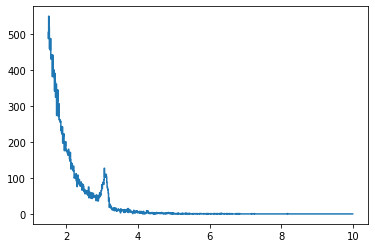

In [34]:
y = all_hist[(0,1)][0][0:]
x = all_hist[(0, 1)][1][0:-1]
plt.step(x, y)

In [14]:
y_range=(-2.5, -4)
all_P_T=True
p_T_range=(0, 8)

In [15]:
df_dm = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=all_P_T, p_T_range=p_T_range)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 55945


In [27]:
df_dm['M_inv'] = df_dm.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

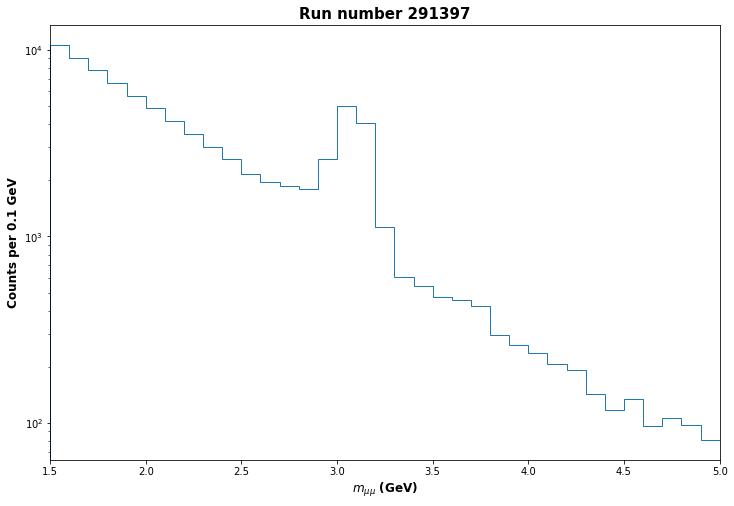

In [40]:
h = Filter.plot_M_inv(df_dm['M_inv'], run_number)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 28186
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 26853
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 9391
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 3507
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 1487
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 656


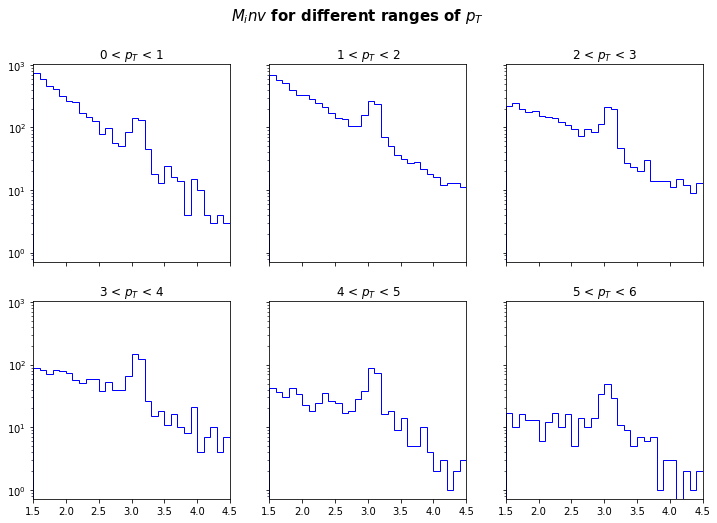

In [51]:
bins = np.linspace(1.5, 5, 36)
fig, axes = plt.subplots(2,3, figsize=(12,8), sharex=True, sharey=True)

p_T_bins = np.arange(0, 7)
axes[0, 0].set_xlim(1.5,4.5)
axes[0, 0].semilogy()


for id, ax  in enumerate(axes.flatten()) :
    p_min, p_max = p_T_bins[[id, id+1]]
    ax.set_title(f'{p_min} < $p_T$ < {p_max}')

    df_dm_selected = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=False, p_T_range=(p_min, p_max))
    df_dm_selected['M_inv'] = df_dm_selected.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)
    ax.hist(df_dm_selected['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')

fig.suptitle('$M_{inv}$ for different ranges of $p_T$', fontweight='bold', fontsize=15)
plt.savefig('M_{inv} several P_t.pdf')

Not really relevant right now, useful for later maybe but i want to keep this code somewhere

In [41]:
from scipy.optimize import curve_fit
from itertools import pairwise

x_c = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])])
m, y = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 3.3  # range of the mass excess

i_min = np.where(m > m_min)[0][0]
i_max = np.where(m < m_max)[0][-1]

x_JP, y_JP = m[i_min:i_max + 1], y[i_min:i_max + 1]
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(m))]
x_without_JP = m[idx]
y_without_JP = y[idx]


In [42]:
def double_exp(z, A, k1, k2):
    return A * np.exp(-k1 * z) + np.exp(-k2 * z)


a, t1, t2 = curve_fit(double_exp, x_without_JP, y_without_JP, p0=(1000, 1,-1))[0]

Text(0.05, 0.5, 'Counts per 0.1 GeV')

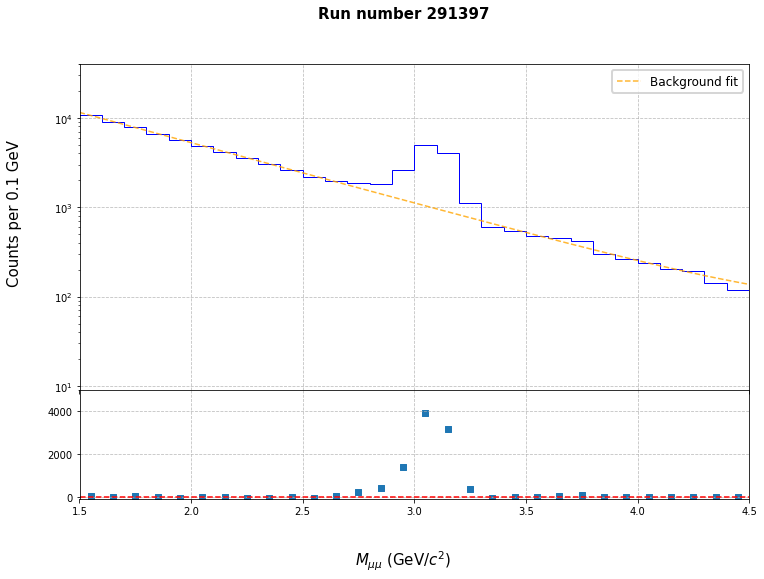

In [48]:
t = np.linspace(1.5, 5, 101)
bins = np.linspace(1.5, 5, 36)
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]}, figsize=(12,8))
fig.suptitle(f'Run number {run_number}', fontsize=15, fontweight='bold')

ax[0].set_xlim(1.5,4.5)
ax[0].semilogy()
ax[0].set_ylim(9,4e4)
ax[0].set_xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)

ax[0].hist(df_dm['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')
ax[0].plot(t, double_exp(t, a, t1, t2), c='orange', linestyle='dashed', alpha=0.8, label='Background fit')

leg = ax[0].legend(fontsize=12)
leg.get_frame().set_linewidth(2.0)
ax[0].grid(linestyle='dashed', alpha=0.8)

ax[1].scatter(x_c, h[0] - double_exp(x_c, a, t1, t2), marker='s')
ax[1].set_ylim(-100,5000)
ax[1].axhline(0, c='r', linestyle='dashed')
ax[1].grid(linestyle='dashed', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.01, '$M_{\mu\mu}$ (GeV/$c^2$)', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Counts per 0.1 GeV', ha='center', fontsize=15, rotation='vertical')